In [ ]:
!pip install stable-baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyl

In [ ]:
!pip install 'shimmy>=0.2.1'

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

ACTUAL CO-ORDINATES

In [ ]:
file_path = "/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt"

try:
    with open(file_path, 'r') as file:
        for _ in range(10):  # Read and print the first 10 lines
            line = file.readline()
            if line:
                print(line.strip())  # Strip to remove leading/trailing whitespaces
            else:
                break  # Exit loop if end of file is reached
except FileNotFoundError:
    print("File not found.")


-2368.138	-986.330	321.145
-2367.714	-1004.297	313.411
-2376.279	-1019.231	298.038
-2378.223	-1012.502	273.642
-2365.118	-997.938	261.125
-2351.073	-995.109	268.959
-2368.705	-991.679	270.584
-2382.356	-979.736	272.085
-2364.160	-962.122	279.714
-2359.462	-944.025	278.630


In [ ]:
PREDICTED MODEL CO-ORDINATES

In [ ]:
file_path = "/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt"

try:
    with open(file_path, 'r') as file:
        for _ in range(10):  # Read and print the first 10 lines
            line = file.readline()
            if line:
                print(line.strip())  # Strip to remove leading/trailing whitespaces
            else:
                break  # Exit loop if end of file is reached
except FileNotFoundError:
    print("File not found.")


4.648162374219894 -8.143243598473118 0.36373964623255606
5.18597105075675 -8.051522204513866 0.7564133427663624
5.6276174410260875 -7.2763643979349855 1.6841529600958216
5.832932494188991 -6.342294085824215 1.4674923244037552
5.905295205251824 -6.01477128112562 0.556950782744535
5.897396564402181 -6.2178305301944015 0.3646467749279071
5.506018946549066 -6.439383048273452 0.5484990141929906
5.043664579985139 -6.032956119567292 0.6868037469658206
4.638842726178161 -6.646412351516741 -0.07925099608142637
3.7419882889064455 -6.560493479928502 -0.23582708754308984


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# Define functions to calculate Pearson and Spearman coefficients
def pearson_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

def spearman_correlation(x, y):
    return pd.Series(x).corr(pd.Series(y), method='spearman')

# Load coordinates from files
def load_coordinates(file_path):
    return np.loadtxt(file_path)

# Define a neural network model
def create_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(3)  # Output layer with 3 nodes for coordinates (x, y, z)
    ])
    model.compile(optimizer='adam', loss='mse')  # Using mean squared error loss
    return model

# Train the model using gradient descent to adjust predicted coordinates
def train_model(model, actual_coordinates, predicted_coordinates, epochs=1000):
    model.fit(predicted_coordinates, actual_coordinates, epochs=epochs, verbose=0)
    adjusted_coordinates = model.predict(predicted_coordinates)
    return model, adjusted_coordinates

# Load coordinates from files
actual_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[1] != predicted_coordinates.shape[1]:
    raise ValueError("Shapes of actual and predicted coordinates are not compatible.")

# Define the input shape for the model
input_shape = (predicted_coordinates.shape[1],)  # Input shape for coordinates (x, y, z)

# Create and train the model
model = create_model(input_shape)
trained_model, adjusted_coordinates = train_model(model, actual_coordinates, predicted_coordinates)

# Calculate Pearson and Spearman coefficients between adjusted coordinates and fixed coordinates
pearson_coefficient = pearson_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())
spearman_coefficient = spearman_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())

print("Pearson Correlation Coefficient:", pearson_coefficient)
print("Spearman Correlation Coefficient:", spearman_coefficient)


20/20 [==============================] - 0s 2ms/step
Pearson Correlation Coefficient: 0.999493735725588
Spearman Correlation Coefficient: 0.993700982942673


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import deque
import random
from scipy.stats import pearsonr, spearmanr

# Define the RL environment
class Environment:
    def __init__(self, actual_coordinates, predicted_coordinates):
        self.actual_coordinates = actual_coordinates
        self.predicted_coordinates = predicted_coordinates
        self.num_coordinates = actual_coordinates.shape[0]
        self.state_size = predicted_coordinates.shape[1]
        self.action_size = 3  # Adjusting coordinates along x, y, and z axes
        self.current_index = 0  # Current index in the coordinate list

    def reset(self):
        self.current_index = 0  # Reset index to the beginning
        return self.predicted_coordinates[self.current_index]

    def step(self, action):
        # Apply the action to adjust the coordinates
        adjusted_coordinates = self.predicted_coordinates[self.current_index] + action

        # Calculate the reward based on how close adjusted coordinates are to actual coordinates
        reward = -np.linalg.norm(adjusted_coordinates - self.actual_coordinates[self.current_index])

        # Move to the next coordinate
        self.current_index += 1

        # Check if episode is done
        done = self.current_index >= self.num_coordinates

        # Return the next state, reward, and whether the episode is done
        next_state = self.predicted_coordinates[self.current_index] if not done else None
        return next_state, reward, done

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()

    def _build_model(self):
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(self.state_size,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_size)  # Output layer with action_size nodes for the action space
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.uniform(-0.1, 0.1, self.action_size)  # Exploration
        return self.model.predict(state.reshape(1, -1)).flatten()  # Exploitation

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1)).flatten()))
            target_f = self.model.predict(state.reshape(1, -1))
            target_f[0][np.argmax(action)] = target
            self.model.fit(state.reshape(1, -1), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Load coordinates from files
actual_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[0] != predicted_coordinates.shape[0]:
    raise ValueError("Number of actual and predicted coordinates don't match.")

# Create the RL environment and agent
env = Environment(actual_coordinates, predicted_coordinates)
agent = DQNAgent(state_size=predicted_coordinates.shape[1], action_size=3)

# Training loop
num_episodes = 10  # Adjusted to run for only 10 episodes
batch_size = 32
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print("Episode:", episode, "Total Reward:", total_reward)
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Adjusted coordinates after training
adjusted_coordinates = np.zeros_like(actual_coordinates)
env.current_index = 0
state = env.reset()
while state is not None:
    action = agent.select_action(state)
    adjusted_coordinates[env.current_index] = state + action
    state, _, _ = env.step(action)

# Save adjusted coordinates to a new file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_001.txt", adjusted_coordinates)

# Calculate final Pearson and Spearman coefficients
final_pearson = pearsonr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
final_spearman = spearmanr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
print("Final Pearson Coefficient:", final_pearson)
print("Final Spearman Coefficient:", final_spearman)


Episode: 0 Total Reward: -1679299.873437608
1/1 [==============================] - 0s 35ms/step
Episode: 1 Total Reward: -1679298.326398599
1/1 [==============================] - 0s 35ms/step
Episode: 2 Total Reward: -1679281.275150483
1/1 [==============================] - 0s 39ms/step
Episode: 3 Total Reward: -1679225.3074095969
1/1 [==============================] - 0s 34ms/step
Episode: 4 Total Reward: -1679129.6254434541
1/1 [==============================] - 0s 27ms/step
Episode: 5 Total Reward: -1679044.329730133
1/1 [==============================] - 0s 40ms/step
Episode: 6 Total Reward: -1678465.0025827982
1/1 [==============================] - 0s 36ms/step
Episode: 7 Total Reward: -1678250.493348967
1/1 [==============================] - 0s 41ms/step
Episode: 8 Total Reward: -1675953.415232298
1/1 [==============================] - 0s 46ms/step
Episode: 9 Total Reward: -1674838.8053405932
1/1 [==============================] - 0s 45ms/step
Final Pearson Coefficient: 0.0318126

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# Define functions to calculate Pearson and Spearman coefficients
def pearson_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

def spearman_correlation(x, y):
    return pd.Series(x).corr(pd.Series(y), method='spearman')

# Load coordinates from files
def load_coordinates(file_path):
    return np.loadtxt(file_path)

# Define the RL environment
class Environment:
    def __init__(self, actual_coordinates, predicted_coordinates):
        self.actual_coordinates = actual_coordinates
        self.predicted_coordinates = predicted_coordinates
        self.num_coordinates = actual_coordinates.shape[0]
        self.state_size = predicted_coordinates.shape[1]
        self.action_size = 3  # Adjusting coordinates along x, y, and z axes
        self.current_index = 0  # Current index in the coordinate list

    def reset(self):
        self.current_index = 0  # Reset index to the beginning
        return self.predicted_coordinates[self.current_index]

    def step(self, action):
        # Apply the action to adjust the coordinates
        adjusted_coordinates = self.predicted_coordinates[self.current_index] + action

        # Calculate the reward based on how close adjusted coordinates are to actual coordinates
        reward = -np.linalg.norm(adjusted_coordinates - self.actual_coordinates[self.current_index])

        # Move to the next coordinate
        self.current_index += 1

        # Check if episode is done
        done = self.current_index >= self.num_coordinates

        # Return the next state, reward, and whether the episode is done
        next_state = self.predicted_coordinates[self.current_index] if not done else None
        return next_state, reward, done

# Define the RL agent
class RLAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self._build_model()

    def _build_model(self):
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(self.state_size,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_size)  # Output layer with action_size nodes for the action space
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def select_action(self, state):
        return self.model.predict(state.reshape(1, -1)).flatten()

    def train(self, state, target):
        self.model.fit(state.reshape(1, -1), target.reshape(1, -1), epochs=1, verbose=0)

# Load coordinates from files
actual_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[1] != predicted_coordinates.shape[1]:
    raise ValueError("Shapes of actual and predicted coordinates are not compatible.")

# Create the RL environment and agent
env = Environment(actual_coordinates, predicted_coordinates)
agent = RLAgent(state_size=predicted_coordinates.shape[1], action_size=3)

# Training loop
num_episodes = 10
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        if not done:
            target = reward + agent.select_action(next_state)
        else:
            target = reward
        agent.train(state, target)
        state = next_state
        total_reward += reward

    print("Episode:", episode, "Total Reward:", total_reward)

# Adjusted coordinates after training
adjusted_coordinates = np.zeros_like(actual_coordinates)
env.current_index = 0
state = env.reset()
while state is not None:
    action = agent.select_action(state)
    adjusted_coordinates[env.current_index] = state + action
    state, _, _ = env.step(action)

# Save adjusted coordinates to a new file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_001.txt", adjusted_coordinates)

# Calculate final Pearson and Spearman coefficients
final_pearson = pearson_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())
final_spearman = spearman_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())

print("Final Pearson Coefficient:", final_pearson)
print("Final Spearman Coefficient:", final_spearman)


1/1 [==============================] - 0s 32ms/step
Episode: 0 Total Reward: -1649549.6393241787
1/1 [==============================] - 0s 27ms/step
Episode: 1 Total Reward: -28694192.10787177
1/1 [==============================] - 0s 25ms/step
Episode: 2 Total Reward: -155445395.0534086
1/1 [==============================] - 0s 59ms/step


KeyboardInterrupt: 

In [ ]:
Evaluation

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.stats import pearsonr, spearmanr

# Define functions to calculate Pearson and Spearman coefficients
def pearson_correlation(x, y):
    return pearsonr(x, y)[0]

def spearman_correlation(x, y):
    return spearmanr(x, y)[0]

# Load coordinates from files
def load_coordinates(file_path):
    return np.loadtxt(file_path)

# Define a neural network model
def create_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(3)  # Output layer with 3 nodes for coordinates (x, y, z)
    ])
    model.compile(optimizer='adam', loss='mse')  # Using mean squared error loss
    return model

# Train the model using gradient descent to adjust predicted coordinates
def train_model(model, actual_coordinates, predicted_coordinates, epochs=1000):
    model.fit(predicted_coordinates, actual_coordinates, epochs=epochs, verbose=0)
    adjusted_coordinates = model.predict(predicted_coordinates)
    return model, adjusted_coordinates

# Define the RL environment
class Environment:
    def __init__(self, actual_coordinates, predicted_coordinates):
        self.actual_coordinates = actual_coordinates
        self.predicted_coordinates = predicted_coordinates
        self.num_coordinates = actual_coordinates.shape[0]
        self.state_size = predicted_coordinates.shape[1]
        self.action_size = 3  # Adjusting coordinates along x, y, and z axes
        self.current_index = 0  # Current index in the coordinate list

    def reset(self):
        self.current_index = 0  # Reset index to the beginning
        return self.predicted_coordinates[self.current_index]

    def step(self, action):
        # Apply the action to adjust the coordinates
        adjusted_coordinates = self.predicted_coordinates[self.current_index] + action

        # Calculate the reward based on how close adjusted coordinates are to actual coordinates
        reward = -np.linalg.norm(adjusted_coordinates - self.actual_coordinates[self.current_index])

        # Move to the next coordinate
        self.current_index += 1

        # Check if episode is done
        done = self.current_index >= self.num_coordinates

        # Return the next state, reward, and whether the episode is done
        next_state = self.predicted_coordinates[self.current_index] if not done else None
        return next_state, reward, done

# Load coordinates from files
actual_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = load_coordinates("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[0] != predicted_coordinates.shape[0]:
    raise ValueError("Number of actual and predicted coordinates don't match.")

# Calculate initial Pearson and Spearman coefficients
initial_pearson = pearson_correlation(actual_coordinates.flatten(), predicted_coordinates.flatten())
initial_spearman = spearman_correlation(actual_coordinates.flatten(), predicted_coordinates.flatten())
print("Initial Pearson Coefficient:", initial_pearson)
print("Initial Spearman Coefficient:", initial_spearman)

# Create and train the model to adjust predicted coordinates
model = create_model(input_shape=(predicted_coordinates.shape[1],))
trained_model, adjusted_coordinates = train_model(model, actual_coordinates, predicted_coordinates)

# Define the RL environment
env = Environment(actual_coordinates, adjusted_coordinates)

# Training loop
num_episodes = 1
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = np.zeros(3)  # No action for adjustment since the coordinates are already adjusted
        next_state, reward, done = env.step(action)
        total_reward += reward

    print("Episode:", episode, "Total Reward:", total_reward)

# Save adjusted coordinates to a new file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_001.txt", adjusted_coordinates)

# Calculate final Pearson and Spearman coefficients
final_pearson = pearson_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())
final_spearman = spearman_correlation(actual_coordinates.flatten(), adjusted_coordinates.flatten())
print("Final Pearson Coefficient:", final_pearson)
print("Final Spearman Coefficient:", final_spearman)


Initial Pearson Coefficient: 0.1293633910873119
Initial Spearman Coefficient: 0.08429335174204362
20/20 [==============================] - 0s 2ms/step
Episode: 0 Total Reward: -26553.05448424698
Final Pearson Coefficient: 0.9995090010134927
Final Spearman Coefficient: 0.994040002439392


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import deque
import random
from scipy.stats import pearsonr, spearmanr

# Define the RL environment
class Environment:
    def __init__(self, actual_coordinates, predicted_coordinates):
        self.actual_coordinates = actual_coordinates
        self.predicted_coordinates = predicted_coordinates
        self.num_coordinates = actual_coordinates.shape[0]
        self.state_size = predicted_coordinates.shape[1]
        self.action_size = 3  # Adjusting coordinates along x, y, and z axes
        self.current_index = 0  # Current index in the coordinate list

    def reset(self):
        self.current_index = 0  # Reset index to the beginning
        return self.predicted_coordinates[self.current_index]

    def step(self, action):
        # Apply the action to adjust the coordinates
        adjusted_coordinates = self.predicted_coordinates[self.current_index] + action

        # Calculate the reward based on how close adjusted coordinates are to actual coordinates
        reward = -1 / (1 + np.linalg.norm(adjusted_coordinates - self.actual_coordinates[self.current_index]))


        # Move to the next coordinate
        self.current_index += 1

        # Check if episode is done
        done = self.current_index >= self.num_coordinates

        # Return the next state, reward, and whether the episode is done
        next_state = self.predicted_coordinates[self.current_index] if not done else None
        return next_state, reward, done

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, batch_size=32, replay_buffer_size=2000):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=replay_buffer_size)
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = self._build_model(learning_rate)
        self.batch_size = batch_size

    def _build_model(self, learning_rate):
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(self.state_size,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_size)  # Output layer with action_size nodes for the action space
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.uniform(-0.1, 0.1, self.action_size)  # Exploration
        return self.model.predict(state.reshape(1, -1)).flatten()  # Exploitation

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1)).flatten()))
            target_f = self.model.predict(state.reshape(1, -1))
            target_f[0][np.argmax(action)] = target
            self.model.fit(state.reshape(1, -1), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Load coordinates from files
actual_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[0] != predicted_coordinates.shape[0]:
    raise ValueError("Number of actual and predicted coordinates don't match.")

# Create the RL environment and agent
env = Environment(actual_coordinates, predicted_coordinates)
agent = DQNAgent(state_size=predicted_coordinates.shape[1], action_size=3)

# Training loop
num_episodes = 10
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print("Episode:", episode, "Total Reward:", total_reward)
    agent.replay()

# Adjusted coordinates after training
adjusted_coordinates = np.zeros_like(actual_coordinates)
env.current_index = 0
state = env.reset()
while state is not None:
    action = agent.select_action(state)
    adjusted_coordinates[env.current_index] = state + action
    state, _, _ = env.step(action)

# Save adjusted coordinates to a new file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_001.txt", adjusted_coordinates)

# Calculate final Pearson and Spearman coefficients
final_pearson = pearsonr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
final_spearman = spearmanr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
print("Final Pearson Coefficient:", final_pearson)
print("Final Spearman Coefficient:", final_spearman)


Episode: 0 Total Reward: -0.2336341806269363
1/1 [==============================] - 0s 22ms/step
Episode: 1 Total Reward: -0.23363390854097857
1/1 [==============================] - 0s 33ms/step
Episode: 2 Total Reward: -0.23363196534193256
1/1 [==============================] - 0s 34ms/step
Episode: 3 Total Reward: -0.23363187318663997
1/1 [==============================] - 0s 33ms/step
Episode: 4 Total Reward: -0.23362982151058745
1/1 [==============================] - 0s 34ms/step
Episode: 5 Total Reward: -0.233628832045841
1/1 [==============================] - 0s 30ms/step
Episode: 6 Total Reward: -0.23363037459910244
1/1 [==============================] - 0s 32ms/step
Episode: 7 Total Reward: -0.23362707618623746
1/1 [==============================] - 0s 29ms/step
Episode: 8 Total Reward: -0.23362759380093995
1/1 [==============================] - 0s 26ms/step
Episode: 9 Total Reward: -0.23363012733095542
1/1 [==============================] - 0s 44ms/step
Final Pearson Coefficie

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import deque
import random
from scipy.stats import pearsonr, spearmanr

# Define the RL environment
class Environment:
    def __init__(self, actual_coordinates, predicted_coordinates):
        self.actual_coordinates = actual_coordinates
        self.predicted_coordinates = predicted_coordinates
        self.num_coordinates = actual_coordinates.shape[0]
        self.state_size = predicted_coordinates.shape[1]
        self.action_size = 3  # Adjusting coordinates along x, y, and z axes
        self.current_index = 0  # Current index in the coordinate list

    def reset(self):
        self.current_index = 0  # Reset index to the beginning
        return self.predicted_coordinates[self.current_index]

    def step(self, action):
        # Apply the action to adjust the coordinates
        adjusted_coordinates = self.predicted_coordinates[self.current_index] + action

        # Calculate the reward based on how close adjusted coordinates are to actual coordinates
        reward = -1 / (1 + np.linalg.norm(adjusted_coordinates - self.actual_coordinates[self.current_index]))

        # Move to the next coordinate
        self.current_index += 1

        # Check if episode is done
        done = self.current_index >= self.num_coordinates

        # Return the next state, reward, and whether the episode is done
        next_state = self.predicted_coordinates[self.current_index] if not done else None
        return next_state, reward, done

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, batch_size=32, replay_buffer_size=2000):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=replay_buffer_size)
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = self._build_model(learning_rate)
        self.batch_size = batch_size

    def _build_model(self, learning_rate):
        model = models.Sequential([
            layers.Dense(128, activation='relu', input_shape=(self.state_size,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(self.action_size)  # Output layer with action_size nodes for the action space
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.uniform(-0.1, 0.1, self.action_size)  # Exploration
        return self.model.predict(state.reshape(1, -1)).flatten()  # Exploitation

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1)).flatten()))
            target_f = self.model.predict(state.reshape(1, -1))
            target_f[0][np.argmax(action)] = target
            self.model.fit(state.reshape(1, -1), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Load coordinates from files
actual_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/actual_coordinates/40_NonTADlike_alpha_50_set0 (1).txt")
predicted_coordinates = np.loadtxt("/content/drive/MyDrive/txt_ Reconstructed_Models/predicted_coordinates/predicted_40_NonTADlike_alpha_50_set0.txt")

# Ensure the shapes of actual and predicted coordinates are compatible
if actual_coordinates.shape[0] != predicted_coordinates.shape[0]:
    raise ValueError("Number of actual and predicted coordinates don't match.")

# Create the RL environment and agent
env = Environment(actual_coordinates, predicted_coordinates)
agent = DQNAgent(state_size=predicted_coordinates.shape[1], action_size=3)

# Training loop
num_episodes = 100  # Increased training duration
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print("Episode:", episode, "Total Reward:", total_reward)
    agent.replay()

# Adjusted coordinates after training
adjusted_coordinates = np.zeros_like(actual_coordinates)
env.current_index = 0
state = env.reset()
while state is not None:
    action = agent.select_action(state)
    adjusted_coordinates[env.current_index] = state + action
    state, _, _ = env.step(action)

# Save adjusted coordinates to a new file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_001.txt", adjusted_coordinates)

# Calculate final Pearson and Spearman coefficients
final_pearson = pearsonr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
final_spearman = spearmanr(actual_coordinates.flatten(), adjusted_coordinates.flatten())[0]
print("Final Pearson Coefficient:", final_pearson)
print("Final Spearman Coefficient:", final_spearman)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 50ms/step
Episode: 84 Total Reward: -0.23360015758936273
1/1 [==============================] - 0s 29ms/step
Episode: 85 Total Reward: -0.2335984033269207
1/1 [==============================] - 0s 24ms/step
Episode: 86 Total Reward: -0.2335926925372186
1/1 [==============================] - 0s 34ms/step
Episode: 87 Total Reward: -0.23359424892665792
1/1 [==============================] - 0s 32ms/step
Episode: 88 Total Reward: -0.23359641950915036
1/1 [==============================] - 0s 30ms/step
Episode: 89 Total Reward: -0.23358956895640468
1/1 [==============================] - 0s 56ms/step
Episode: 90 Total Reward: -0.23359422231946328
1/1 [==============================] - 0s 22ms/step
Episode: 91 Total Reward: -0.23359930831007178
1/1 [==============================] - 0s 25ms/step
Episode: 92 Total Reward: -0.23359784646905946
1/1 [==============================] - 0s 39ms/step
Episode:

In [ ]:
# Save adjusted coordinates to a .txt file
np.savetxt("/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_40_NonTADlike_alpha_50_set0.txt", adjusted_coordinates, delimiter="\t")


In [ ]:
def convert_to_pdb(txt_file_path, pdb_file_path):
    with open(txt_file_path, 'r') as f:
        lines = f.readlines()

    # Open the PDB file for writing
    with open(pdb_file_path, 'w') as f:
        # Write PDB header
        f.write("HEADER    Generated by Python\n")

        # Write each coordinate as an ATOM record
        atom_count = 0
        for line in lines:
            atom_count += 1
            x, y, z = line.strip().split("\t")
            f.write(f"ATOM  {atom_count:5d}  C   UNK A{atom_count:4d}    {x:8s}{y:8s}{z:8s}\n")

        # Write TER record to indicate end of atoms
        f.write("TER\n")

        # Write END record to indicate end of file
        f.write("END\n")

# Example usage:
txt_file_path = "/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_40_NonTADlike_alpha_50_set0.txt"  # Path to your text file containing coordinates
pdb_file_path = "/content/drive/MyDrive/txt_ Reconstructed_Models/pdb_files/adjusted_coordinates_40_NonTADlike_alpha_50_set0.pdb"  # Path to save the PDB file

convert_to_pdb(txt_file_path, pdb_file_path)


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install torch_sparse


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1071448 sha256=1c28cdd86aee2d69ad1c5f405018e804dd8ff30f7ef5c4939e9824742d3fc89c
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch_sparse


In [ ]:
!pip install torch_scatter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=504020 sha256=4c8413388b02bd71fa66bccc2fd8895c80d6d34690e38764dda91316fd48b393
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch_scatter


In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import torch
from torch_geometric.data import Data
from torch_sparse import SparseTensor
import networkx as nx
from scipy.linalg import orthogonal_procrustes
import pdb


def convert_to_matrix(adj):
    temp1 = adj[:,0]
    temp2 = adj[:,1]
    temp3 = np.concatenate((temp1, temp2))
    idx = np.unique(temp3)
    size = len(idx)
    mat = np.zeros((size, size))
    for k in range(len(adj)):
        i = int(np.argwhere(adj[k, 0] == idx))
        j = int(np.argwhere(adj[k, 1] == idx))
        mat[i, j] = adj[k,2]
    mat = np.triu(mat) + np.tril(mat.T, 1)
    idx = np.argwhere(np.all(mat[..., :] == 0, axis=0))
    mat = np.delete(mat, idx, axis=1)
    mat = np.delete(mat, idx, axis=0)

    return mat


def load_input(input_file, features):
    adj_mat = np.loadtxt(input_file)
    if adj_mat.shape[1] == 3:
        adj_mat = convert_to_matrix(adj_mat)
    np.fill_diagonal(adj_mat,0)
    truth = adj_mat
    truth = torch.tensor(truth, dtype=torch.double)
    graph = nx.from_numpy_array(adj_mat)  # Corrected line
    graph = graph.to_undirected()  # Add this line to ensure the graph is undirected
    num_nodes = adj_mat.shape[0]
    edges = list(graph.edges(data=True))
    edge_index = np.empty((len(edges),2))
    edge_weights = np.empty((len(edges)))
    nodes = np.empty(num_nodes)

    for i in range(len(edges)):
        edge_index[i] = np.asarray(edges[i][0:2])
        edge_weights[i] = np.asarray(edges[i][2]["weight"])

    for i in range(num_nodes):
        nodes[i] = np.asarray(i)

    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weights = torch.tensor(edge_weights, dtype=torch.float)
    nodes = torch.tensor(nodes, dtype=torch.long)
    node_attr = torch.tensor(features)

    edge_index = edge_index.t().contiguous()

    mask = edge_index[0] != edge_index[1]
    edge_index = edge_index[:, mask]
    edge_attr = edge_weights[mask]

    data = Data(x=node_attr, edge_index=edge_index, edge_attr=edge_attr, y=truth)

    adj = SparseTensor(row=data.edge_index[0], col=data.edge_index[1], value=data.edge_attr, sparse_sizes=(num_nodes, num_nodes))
    data.edge_index = adj.to_symmetric()
    data.edge_attr = None
    return data

def cont2dist(adj,factor):
    dist = (1/adj)**factor
    dist.fill_diagonal_(0)
    max_val = torch.max(torch.nan_to_num(dist,posinf=0))
    dist = torch.nan_to_num(dist,posinf=max_val)
    return dist/max_val

def domain_alignment(list1, list2, embeddings1, embeddings2):
    idx1 = np.unique(list1[:,0]).astype(int)
    diff1 = min(idx1[1:] - idx1[:-1])

    idx2 = np.unique(list2[:,0]).astype(int)
    diff2 = min(idx2[1:] - idx2[:-1])

    bins = (diff1/(2*diff2)).astype(int)

    A_list = []
    B_list = []

    for i in range(bins+1):
        Aidx = np.where(np.isin(idx2 + i*diff2, idx1))[0]
        Bidx = np.where(np.isin(idx1, idx2 + i*diff2))[0]

        A_list.append(embeddings2[Aidx,:])
        B_list.append(embeddings1[Bidx,:])

    A = np.concatenate(tuple(A_list))
    B = np.concatenate(tuple(B_list))

    transform = orthogonal_procrustes(A, B)[0]
    fitembed = np.matmul(embeddings2, transform)

    return fitembed

def WritePDB(positions, pdb_file, ctype="0"):
    '''Save the result as a .pdb file'''
    o_file = open(pdb_file, "w")
    o_file.write("\n")

    col1 = "ATOM"
    col3 = "CA MET"
    col8 = "0.20 10.00"

    bin_num = len(positions)

    for i in range(1, bin_num+1):
        col2 = str(i)
        col4 = "B"+col2
        col5 = "%.3f" % positions[i-1][0]
        col6 = "%.3f" % positions[i-1][1]
        col7 = "%.3f" % positions[i-1][2]
        col2 = " "*(5 - len(col2)) + col2
        col4 = col4 + " " * (6 - len(col4))
        col5 = " " * (8 - len(col5)) + col5
        col6 = " " * (8 - len(col6)) + col6
        col7 = " " * (8 - len(col7)) + col7

        col = (col1, col2, col3, col4, col5, col6, col7, col8)
        line = "%s  %s   %s %s   %s%s%s  %s\n" % col
        o_file.write(line)
    col1 = "CONECT"
    for i in range(1, bin_num+1):
        col2 = str(i)
        j = i + 1
        if j > bin_num:
            if ctype == "1":
                continue
            #j = 1
        col3 = str(j)

        col2 = " " * (5 - len(col2)) + col2
        col3 = " " * (5 - len(col3)) + col3

        line = "%s%s%s\n" % (col1, col2, col3)
        o_file.write(line)

    o_file.write("END")
    o_file.close()

# Example usage:
# Load input from a text file
input_file = "/content/drive/MyDrive/txt_ Reconstructed_Models/adjust_cordinates/adjusted_coordinates_40_NonTADlike_alpha_50_set0.txt"  # Replace with your file name
features = []  # Replace with your feature vector
data = load_input(input_file, features)

# Perform operations...

# Write output to a PDB file
positions = np.random.rand(10, 3)  # Replace with your positions
pdb_file = "/content/drive/MyDrive/txt_ Reconstructed_Models/pdb_files/output001.pdb"  # Replace with your desired output file name
WritePDB(positions, pdb_file)


<ipython-input-23-afb70a875476>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i = int(np.argwhere(adj[k, 0] == idx))


Final Structure:
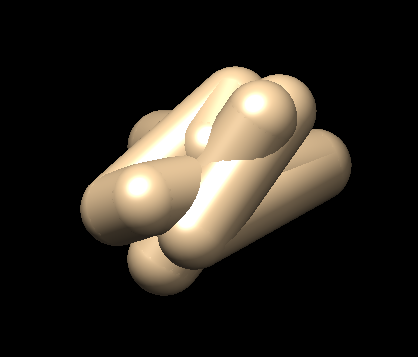